# Mạng Nơ-ron Hồi quy (RNN)

## 1. Giới thiệu về RNN

RNN là một loại mạng nơ-ron nhân tạo được thiết kế để xử lý *dữ liệu tuần tự* (sequential data), như chuỗi thời gian, văn bản, hoặc âm thanh. Điểm đặc biệt của RNN là khả năng "ghi nhớ" thông tin từ các bước trước đó nhờ cấu trúc vòng lặp.

### Tại sao cần RNN?

- Trong mạng nơ-ron truyền thống, mỗi đầu vào là độc lập, không có mối quan hệ với các đầu vào trước đó.
- Với RNN, thông tin từ bước trước được truyền sang bước hiện tại, cho phép học các mẫu trong chuỗi dữ liệu.

### Ứng dụng của RNN

- Dự đoán chuỗi thời gian (ví dụ: giá cổ phiếu).
- Xử lý ngôn ngữ tự nhiên (NLP): dịch máy, sinh văn bản.
- Nhận diện giọng nói.

## 2. Cấu trúc của RNN

RNN có một vòng lặp trong kiến trúc, cho phép trạng thái ẩn (hidden state) được cập nhật qua từng bước thời gian. Các thành phần cơ bản:

- **Đầu vào:** $x_t$ tại thời điểm $t$.
- **Trạng thái ẩn:** $h_t$, lưu trữ thông tin từ các bước trước.
- **Đầu ra:** $y_t$ tại thời điểm $t$.

### Sơ đồ cơ bản

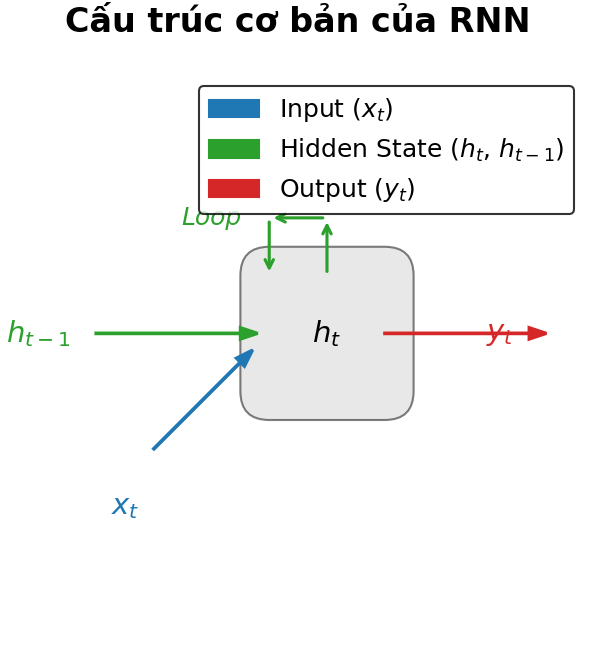


## 3. Công thức toán học của RNN

### 3.1. Công thức tính trạng thái ẩn

Trạng thái ẩn $h_t$ được cập nhật theo công thức:

$$   h_t = f(W_{hh} \cdot h_{t-1} + W_{xh} \cdot x_t + b_h)   $$

Trong đó:
- $x_t$: Vector đầu vào tại thời điểm $t$.
- $h_{t-1}$: Trạng thái ẩn từ bước trước.
- $W_{hh}$: Ma trận trọng số kết nối giữa các trạng thái ẩn.
- $W_{xh}$: Ma trận trọng số từ đầu vào đến trạng thái ẩn.
- $b_h$: Vector bias cho tầng ẩn.
- $f$: Hàm kích hoạt phi tuyến (thường là $\tanh$ hoặc $\text{sigmoid}$).

#### Giải thích:

- $W_{hh} \cdot h_{t-1}$: Phần "ghi nhớ" từ trạng thái trước.
- $W_{xh} \cdot x_t$: Phần thông tin mới từ đầu vào hiện tại.
- Hàm $f$ đưa giá trị vào khoảng hợp lý (ví dụ: $\tanh$ từ $-1$ đến $1$).

#### Ví dụ:

Giả sử:
- $x_t = [0.5, 0.1]$, $h_{t-1} = [0.2, 0.3]$,
- $W_{xh} = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}$, $W_{hh} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix}$, $b_h = [0.1, 0.2]$,
- Hàm $f = \tanh$.

Tính toán:
1. $W_{xh} \cdot x_t = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \cdot \begin{bmatrix} 0.5 \\ 0.1 \end{bmatrix} = \begin{bmatrix} 0.07 \\ 0.19 \end{bmatrix}$,
2. $W_{hh} \cdot h_{t-1} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \cdot \begin{bmatrix} 0.2 \\ 0.3 \end{bmatrix} = \begin{bmatrix} 0.28 \\ 0.38 \end{bmatrix}$,
3. Tổng: $h_t^{pre} = [0.07 + 0.28 + 0.1, 0.19 + 0.38 + 0.2] = [0.45, 0.77]$,
4. Áp dụng $\tanh$: $h_t = [\tanh(0.45), \tanh(0.77)] \approx [0.422, 0.645]$.

Kết quả: $h_t = [0.422, 0.645]$.

### 3.2. Công thức tính đầu ra

Đầu ra $y_t$ được tính từ trạng thái ẩn:

$$   y_t = g(W_{hy} \cdot h_t + b_y)   $$

Trong đó:
- $W_{hy}$: Ma trận trọng số từ tầng ẩn đến đầu ra.
- $b_y$: Vector bias cho đầu ra.
- $g$: Hàm kích hoạt (ví dụ: $\text{softmax}$ cho phân loại).

#### Ví dụ tiếp nối:

Giả sử:
- $W_{hy} = \begin{bmatrix} 0.9 & 0.8 \end{bmatrix}$, $b_y = [0.05]$,
- $g = \text{sigmoid}$.

Tính toán:
1. $W_{hy} \cdot h_t = [0.9, 0.8] \cdot [0.422, 0.645] = 0.8958$,
2. Thêm bias: $0.8958 + 0.05 = 0.9458$,
3. Áp dụng $\text{sigmoid}$: $y_t = \frac{1}{1 + e^{-0.9458}} \approx 0.72$.

Kết quả: $y_t \approx 0.72$.

## 4. Huấn luyện RNN (Backpropagation Through Time - BPTT)

RNN được huấn luyện bằng lan truyền ngược qua thời gian (BPTT). Tổng mất mát:

$$   L = \sum_{t=1}^{T} L_t   $$

### Gradient:

$$   \frac{\partial L}{\partial W_{hh}} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial h_t} \cdot \frac{\partial h_t}{\partial W_{hh}}   $$

### Vấn đề Gradient biến mất:

Khi chuỗi dài, gradient có thể trở nên rất nhỏ, gây khó khăn trong việc học phụ thuộc dài hạn.

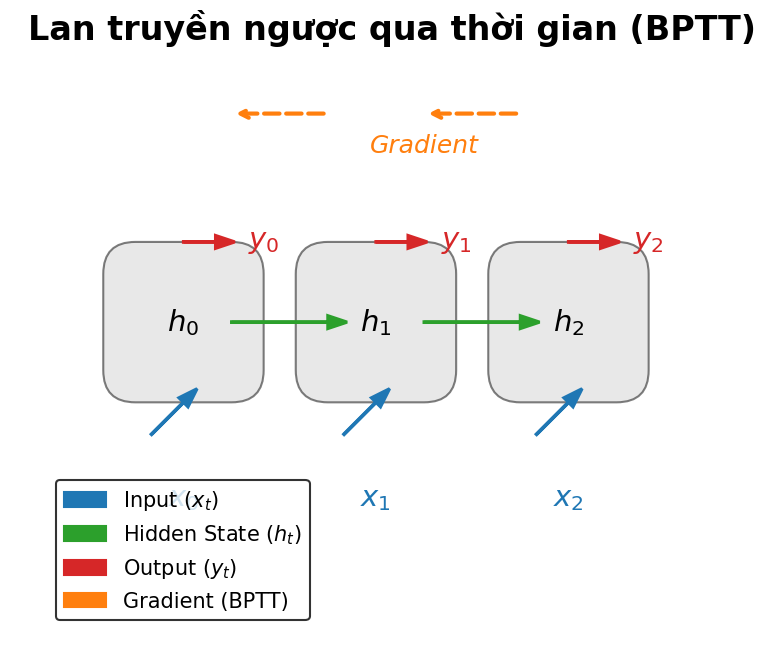

## 5. Ví dụ

Giả sử dự đoán từ tiếp theo trong câu "Tôi thích học":
- Từ điển: \{Tôi: $[1,0,0]$, thích: $[0,1,0]$, học: $[0,0,1]$\}.
- RNN dự đoán: $y_3 = [0.1, 0.2, 0.7] \rightarrow$ "học".

## 6. So sánh RNN và Feedforward Neural Network

| **RNN**                | **Feedforward NN**     |
|------------------------|------------------------|
| Xử lý dữ liệu tuần tự  | Đầu vào độc lập        |
| Có trạng thái ẩn $h_t$ | Không có bộ nhớ        |

## 7. Gradient biến mất

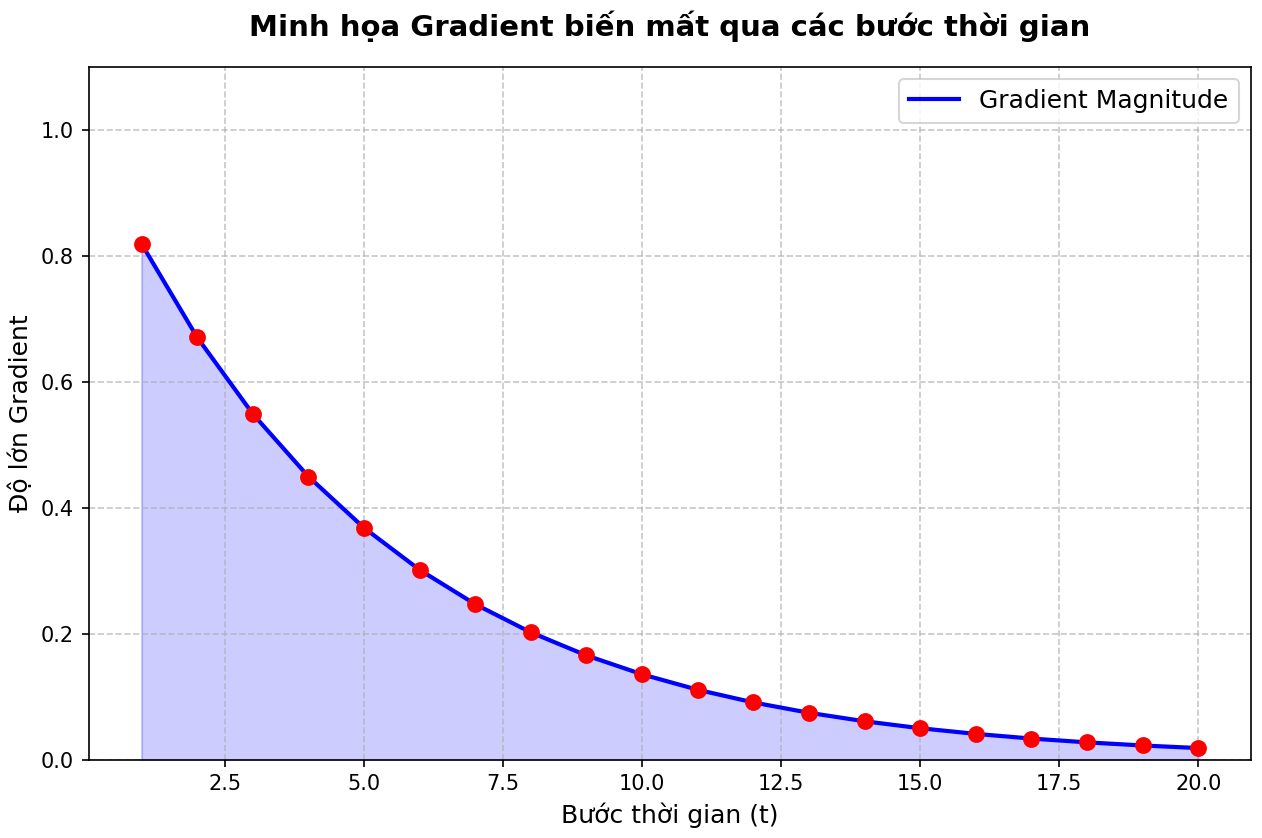


## 8. Kết luận

RNN mạnh mẽ trong xử lý chuỗi, nhưng có hạn chế với chuỗi dài. Các biến thể như LSTM, GRU khắc phục vấn đề này.



# BÀI THỰC HÀNH CƠ BẢN VỚI RNN

In [1]:
# Import các thư viện cần thiết
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)
np.random.seed(42)



In [ ]:
# 1. Chuẩn bị dữ liệu
# Tdữ liệu sin wave 
time_steps = 100
x = np.linspace(0, 20, time_steps)
data = np.sin(x) + 0.1 * np.random.randn(time_steps)

# Chuẩn hóa dữ liệu về khoảng [0, 1]
data = (data - data.min()) / (data.max() - data.min())

# Chuyển thành tensor PyTorch và thêm chiều batch
data = torch.FloatTensor(data).unsqueeze(1)  # Shape: [100, 1]

# Hàm tạo chuỗi con cho huấn luyện
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return torch.stack(X), torch.stack(y)

seq_length = 10  # Độ dài mỗi chuỗi
X, y = create_sequences(data, seq_length)  # X: [90, 10, 1], y: [90, 1]

In [3]:

# Chia 80% tập huấn luyện và 20% kiểm tra
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [4]:
# 2. Xây dựng mô hình RNN
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=20, output_size=1):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out[:, -1, :])  # Lấy đầu ra của bước cuối cùng
        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(1, batch_size, self.hidden_size)

In [5]:
# Khởi tạo mô hình
model = RNN(input_size=1, hidden_size=20, output_size=1)


In [6]:
# 3. Định nghĩa hàm mất mát và tối ưu hóa
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
# 4. Huấn luyện mô hình
num_epochs = 100
batch_size = 16
loss_history = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    hidden = model.init_hidden(batch_size)
    
    # Tạo các batch ngẫu nhiên
    indices = torch.randperm(len(X_train))[:batch_size]
    X_batch = X_train[indices]
    y_batch = y_train[indices]
    
    hidden = model.init_hidden(batch_size)
    
    output, hidden = model(X_batch, hidden)
    loss = criterion(output, y_batch)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    total_loss += loss.item()
    loss_history.append(total_loss)  # Lưu loss
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}')

Epoch [10/100], Loss: 0.0554
Epoch [20/100], Loss: 0.0112
Epoch [30/100], Loss: 0.0051
Epoch [40/100], Loss: 0.0073
Epoch [50/100], Loss: 0.0036
Epoch [60/100], Loss: 0.0028
Epoch [70/100], Loss: 0.0025
Epoch [80/100], Loss: 0.0036
Epoch [90/100], Loss: 0.0027
Epoch [100/100], Loss: 0.0031


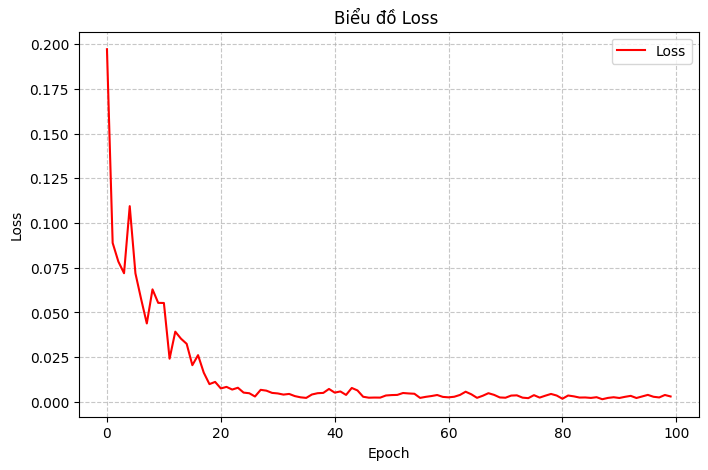

In [8]:
# Vẽ biểu đồ Loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Biểu đồ Loss ")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [9]:
# 5. Đánh giá mô hình
model.eval()
with torch.no_grad():
    hidden = model.init_hidden(1)
    predictions = []
    inputs = X_test[0].unsqueeze(0)  # Bắt đầu với mẫu đầu tiên
    
    for _ in range(len(X_test)):
        output, hidden = model(inputs, hidden)
        predictions.append(output.item())
        inputs = torch.cat((inputs[:, 1:, :], output.unsqueeze(0)), dim=1)



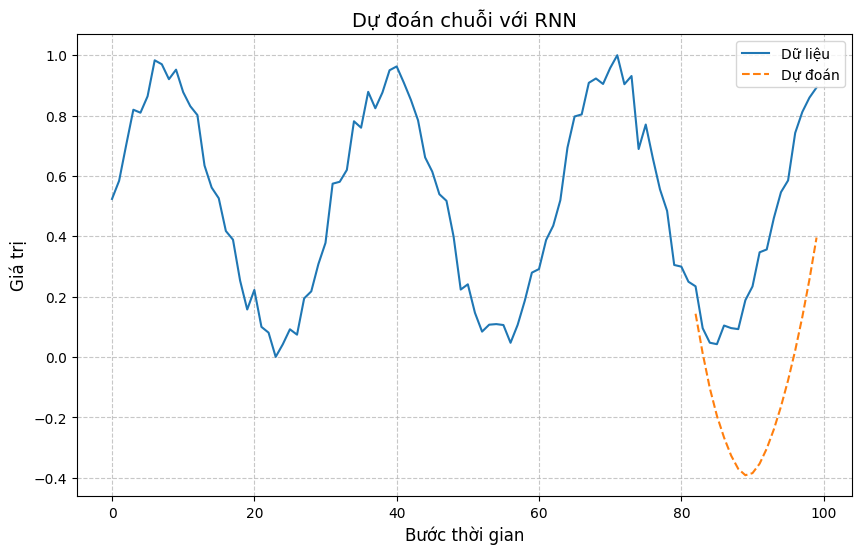

In [10]:
# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.plot(data.numpy(), label='Dữ liệu')
plt.plot(np.arange(len(data) - len(y_test), len(data)), predictions, label='Dự đoán', linestyle='--')
plt.title('Dự đoán chuỗi với RNN', fontsize=14)
plt.xlabel('Bước thời gian', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 6. Một số dự đoán để kiểm tra
print("\nDự đoán trên tập kiểm tra:")
for i in range(5):
    print(f'Dự đoán {i}: {predictions[i]:.4f}, Thực tế: {y_test[i].item():.4f}')



Dự đoán trên tập kiểm tra:
Dự đoán 0: 0.1431, Thực tế: 0.2340
Dự đoán 1: 0.0118, Thực tế: 0.0951
Dự đoán 2: -0.1034, Thực tế: 0.0470
Dự đoán 3: -0.1952, Thực tế: 0.0422
Dự đoán 4: -0.2672, Thực tế: 0.1040


# BÀI TẬP VỀ NHÀ ----